In [1]:
import pandas as pd
import numpy as np
import pdb, argparse
import os, pdb, math, itertools
from dotenv import load_dotenv

load_dotenv()

True

In [2]:
from kdutils.macro2 import *

In [3]:
method = 'bicso0'
instruments = 'rbb'
period = 5
name = 'linear'
task_id = str(INDEX_MAPPING[INSTRUMENTS_CODES[instruments]])

In [4]:
dirs = os.path.join(base_path, method, instruments, 'temp', "model", task_id,
                    str(period))

In [5]:
filename = os.path.join(dirs, "{0}_predict_data.feather".format(name))
filename

'./records/bicso0/rbb/temp/model/113001/5/linear_predict_data.feather'

In [6]:
predict_data = pd.read_feather(filename)
predict_data.head()

,trade_time,code,predict,nxt1_ret_5h
0,2024-09-04 09:41:00,RB,-5.493892,0.000950
1,2024-09-04 09:42:00,RB,-6.037653,0.000754
2,2024-09-04 09:43:00,RB,-5.875721,0.000765
3,2024-09-04 09:44:00,RB,-6.191601,0.001042
4,2024-09-04 09:45:00,RB,-5.917475,0.000621


In [7]:
is_on_mark = predict_data['trade_time'].dt.minute % int(period) == 0
predict_data = predict_data[is_on_mark]
predict_data.replace([np.inf, -np.inf], np.nan, inplace=True)
predict_data.dropna(inplace=True)
predict_data.head()

,trade_time,code,predict,nxt1_ret_5h
4,2024-09-04 09:45:00,RB,-5.917475,0.000621
9,2024-09-04 09:50:00,RB,-5.689486,0.000697
14,2024-09-04 09:55:00,RB,-5.603754,0.000195
19,2024-09-04 10:00:00,RB,-7.512174,-0.001021
24,2024-09-04 10:05:00,RB,-7.474522,-0.000899


In [8]:
from lib.cux001 import FactorEvaluate1

In [9]:
evaluate1 = FactorEvaluate1(factor_data=predict_data,
                                factor_name='predict',
                                ret_name='nxt1_ret_{0}h'.format(period),
                                roll_win=240,
                                fee=0.000,
                                scale_method='roll_zscore',
                                expression=name)

In [10]:
stats_dt = evaluate1.run()

In [11]:
stats_dt

{'total_ret': 0.12295969053079303,
 'avg_ret': 1.4073635806383712e-05,
 'max_dd': -0.02652941030675049,
 'calmar': 4.634844465408474,
 'sharpe1': 0.024744486643176813,
 'sharpe2': 2.3318329897733947,
 'turnover': 0.4286420125023485,
 'win_rate': 0.5024486940298507,
 'profit_ratio': 1.1046089377354227,
 'ic_mean': 0.027580216687081136,
 'ic_std': 0.07855153939072484,
 'ic_ir': 0.35110981784702916,
 'factor_autocorr': -0.22503603728220775,
 'ret_autocorr': 0.015824625765120705}

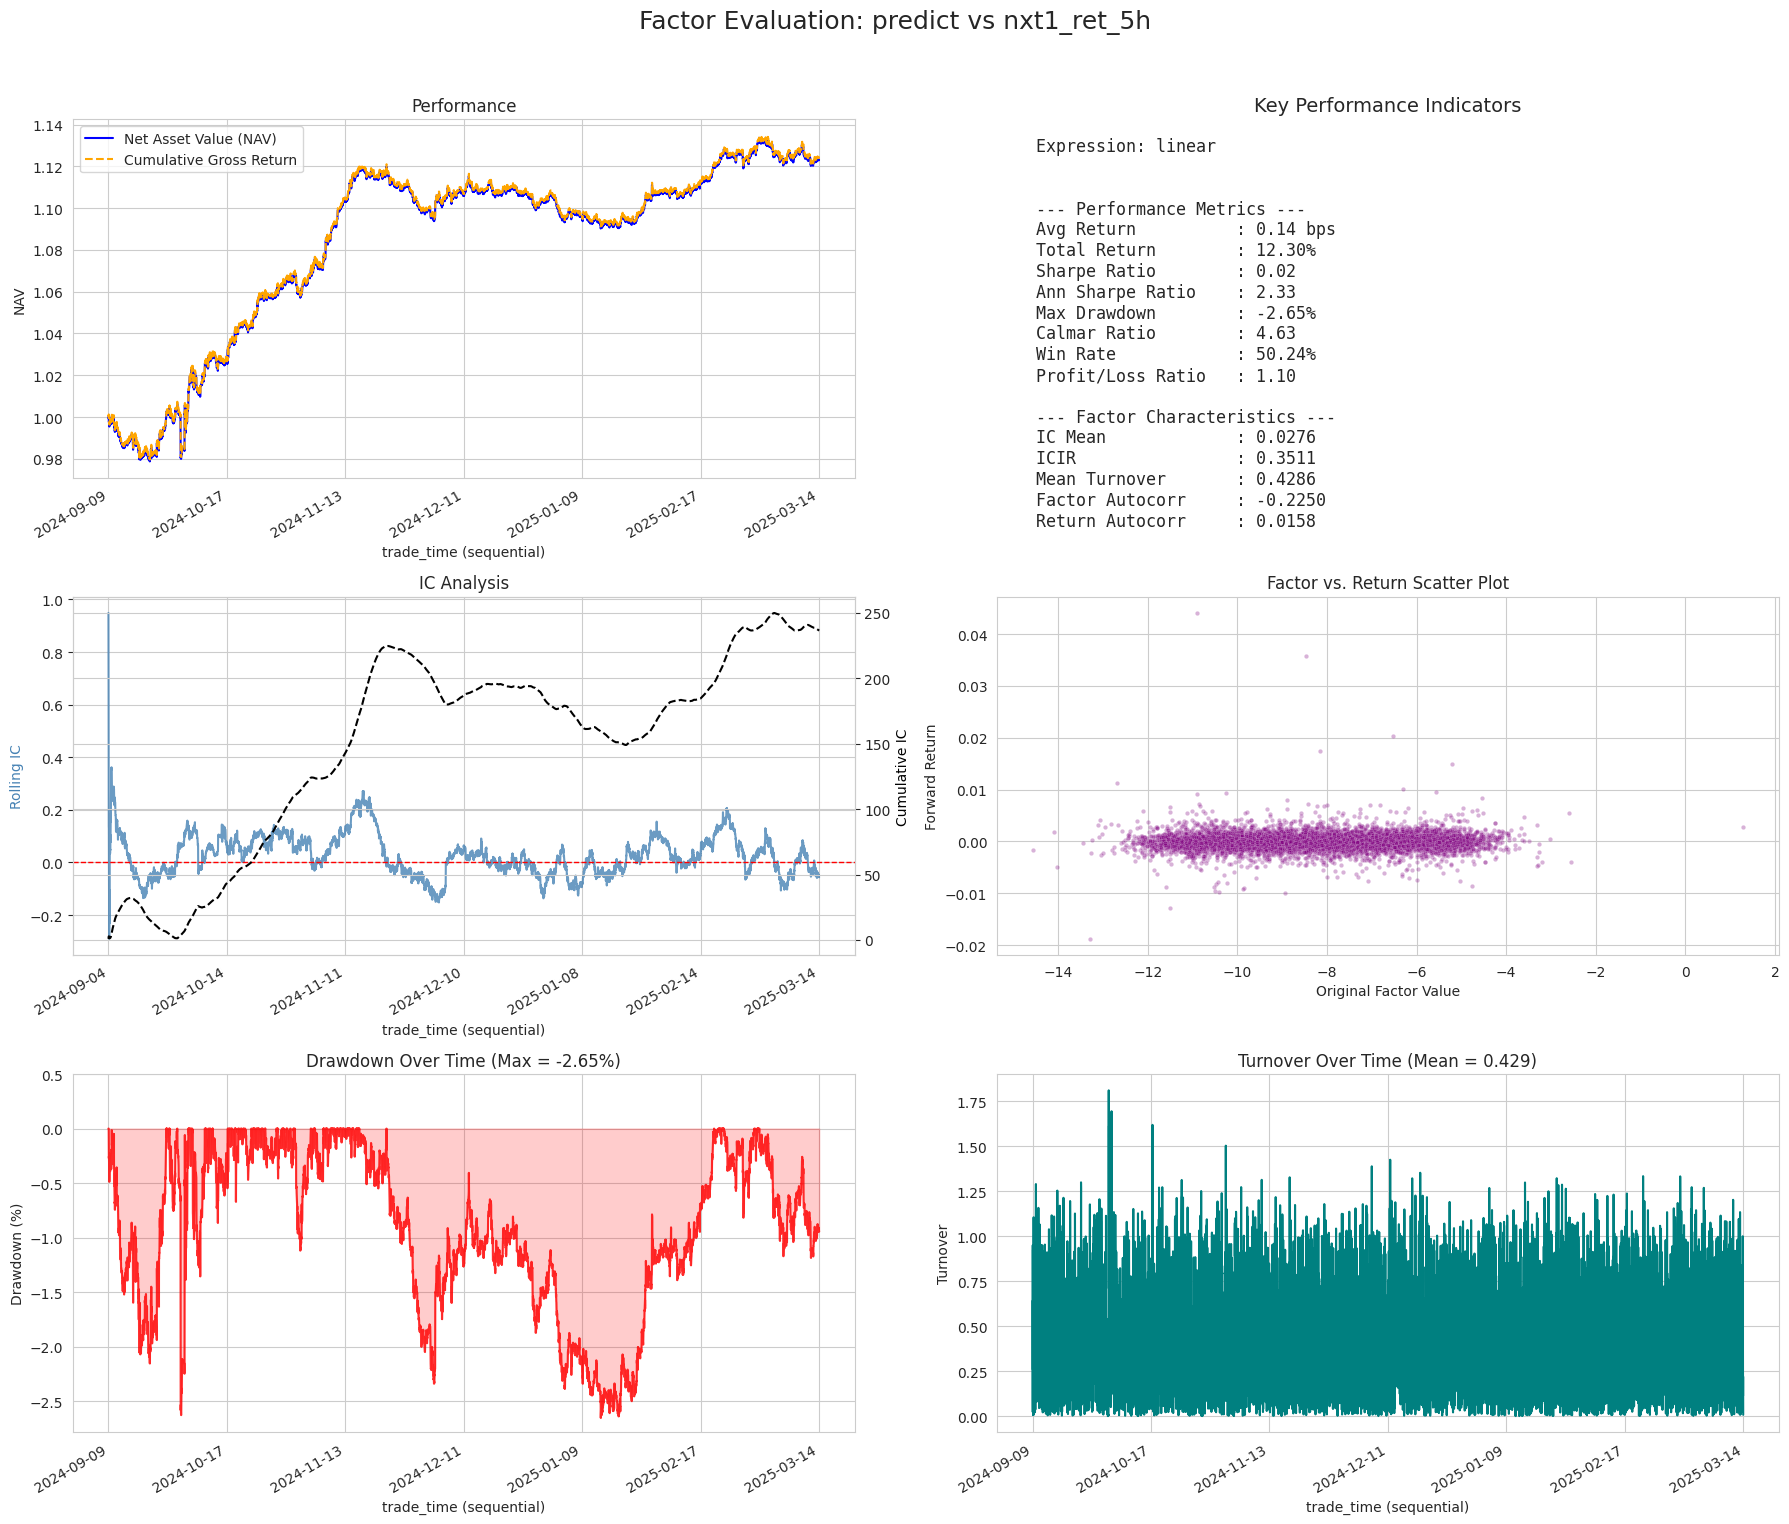

In [12]:
evaluate1.plot_results()